# Understanding Why People Vote

In August 2006 three researchers (Alan Gerber and Donald Green of Yale University, and Christopher Larimer of the University of Northern Iowa) carried out a large scale field experiment in Michigan, USA to test the hypothesis that one of the reasons people vote is social, or extrinsic, pressure. In this homework problem we will use both logistic regression and classification trees to analyze the data they collected.

The researchers grouped about 344,000 voters into different groups randomly - about 191,000 voters were a "control" group, and the rest were categorized into one of four "treatment" groups. These five groups correspond to five binary variables in the dataset.

"Civic Duty" (variable __civicduty__) group members were sent a letter that simply said "DO YOUR CIVIC DUTY - VOTE!"

"Hawthorne Effect" (variable __hawthorne__) group members were sent a letter that had the "Civic Duty" message plus the additional message "YOU ARE BEING STUDIED" and they were informed that their voting behavior would be examined by means of public records.

"Self" (variable __self__) group members received the "Civic Duty" message as well as the recent voting record of everyone in that household and a message stating that another message would be sent after the election with updated records.

"Neighbors" (variable __neighbors__) group members were given the same message as that for the "Self" group, except the message not only had the household voting records but also that of neighbors - maximizing social pressure.

"Control" (variable __control__) group members were not sent anything, and represented the typical voting situation.

Additional variables include __sex__ (0 for male, 1 for female), __yob__ (year of birth), and the dependent variable __voting__ (1 if they voted, 0 otherwise).

### Understanding data

We will first get familiar with the data. Load the CSV file `gerber.csv`. What proportion of people in this dataset voted in this election?

In [1]:
import pandas as pd

In [2]:
gerber = pd.read_csv(r'./Data/gerber.csv')

In [3]:
gerber['voting'].sum()/len(gerber)

0.31589960591018473

Which of the four "treatment groups" had the largest percentage of people who actually voted (voting = 1)?

In [4]:
pd.pivot_table(gerber, values=['hawthorne', 'civicduty', 'neighbors', 'self'], index=['voting'])

,civicduty,hawthorne,neighbors,self
voting,,,,
0,0.111293,0.109980,0.100952,0.106322
1,0.110593,0.113307,0.132829,0.121357


### Exploration and Logistic Regression

Build a logistic regression model for `voting` using the four treatment group variables as the independent variables (`civicduty`, `hawthorne`, `self`, and `neighbors`). Use all the data to build the model.

In [5]:
from sklearn.linear_model import LogisticRegression

features = ['hawthorne', 'civicduty', 'neighbors', 'self']
X = gerber[features]
y = gerber['voting']

model = LogisticRegression(C=1.e8, solver='liblinear').fit(X,y)

Using a threshold of 0.3, what is the accuracy of the logistic regression model?

In [6]:
# predict outcome probabilities using training data
y_prob = model.predict_proba(X)

# P('voting'=1)>= cutoff
y_pred = y_prob[:,1]>=0.3

(y_pred == y).sum()/len(y)

0.5419577777519443

Using a threshold of 0.5, what is the accuracy of the logistic regression model?

In [7]:
# P('voting'=1)>= cutoff
y_pred = y_prob[:,1]>=0.5

(y_pred == y).sum()/len(y)

0.6841003940898153

The baseline accuracy

In [8]:
# most frequent outcome of dependent variable
gerber['voting'].value_counts().max()/len(gerber)

0.6841003940898153

In [9]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y, y_pred)

0.5

Our model does not improve over the baseline model of just predicting that someone will not vote, and the AUC is low. So while the treatment groups do make a difference, this is a weak predictive model.

### Trees

We will now try out trees. Build a CART tree for `voting` using all data and the same four treatment variables we used before. We are actually going to create a regression tree here. We are interested in building a tree to explore the probability of voting. 

In [23]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import export_graphviz, plot_tree
from IPython.display import Image  
import os

#Tell Python where the graphviz package is load; then load it.
os.environ["PATH"] += os.pathsep + 'C:\\Users\\Olena\\Miniconda3\\pkgs\\graphviz-2.38-hfd603c8_2\\Library\\bin\\graphviz'

import graphviz
import pydotplus

CARTmodel = DecisionTreeRegressor().fit(X,y)


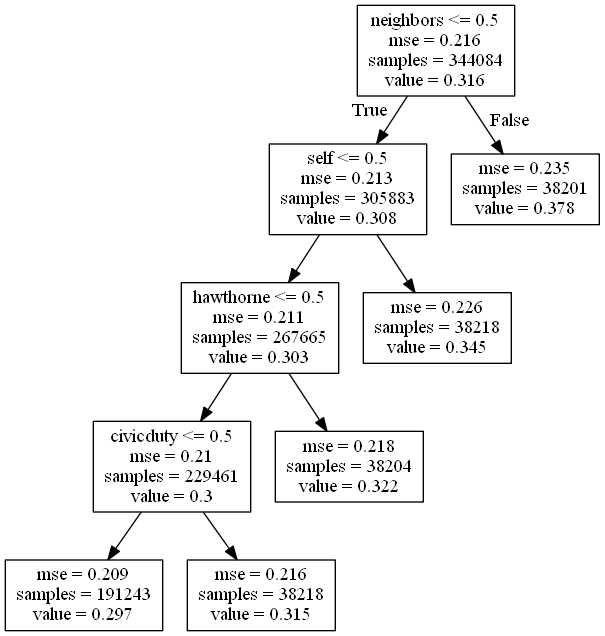

In [25]:
# Create DOT data
dot_data = export_graphviz(CARTmodel, out_file=None, 
                                feature_names=X.columns,  
                                class_names=y.unique()) #, rotate=True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

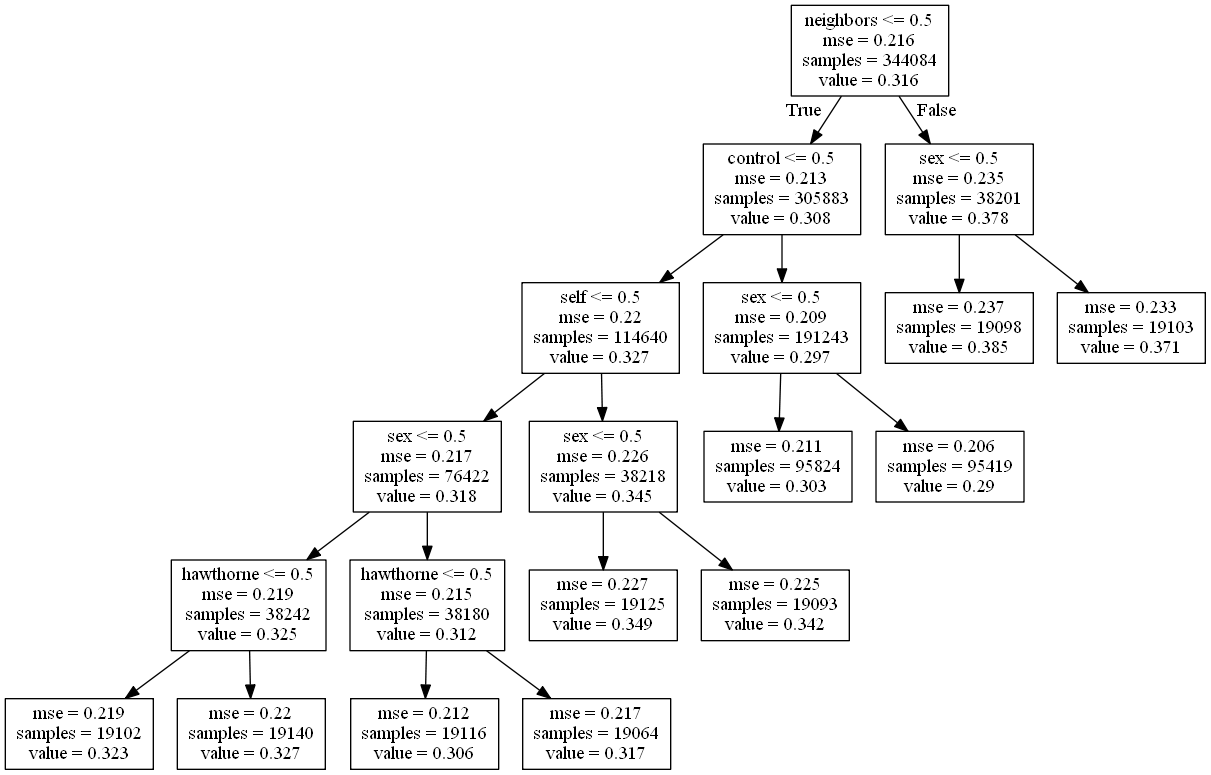

In [27]:
features = ['hawthorne', 'civicduty', 'neighbors', 'self', 'sex', 'control']
X1 = gerber[features]
y1 = gerber['voting']

CARTmodel1 = DecisionTreeRegressor().fit(X1,y1)

# Create DOT data
dot_data = export_graphviz(CARTmodel1, out_file=None, 
                                feature_names=X1.columns,  
                                class_names=y1.unique())
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())
